In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [8]:
fake = pd.read_csv("C:/Users/q/Downloads/Fake and real news dataset/Fake.csv")
true = pd.read_csv("C:/Users/q/Downloads/Fake and real news dataset/True.csv")

In [9]:
fake.shape


(23481, 4)

In [11]:
display(true.head())


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [12]:
true.shape


(21417, 4)

# Data cleaning and preparation

In [13]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [14]:
fake.head()


,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [15]:
true.head()


,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [16]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [17]:
data.head(5)


,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [18]:
data.tail(5)


,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [19]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [20]:
# Check the data
data.head()

,title,text,subject,date,target
0,"AS IT TURNS OUT, OBAMA HAS LEGITIMATE REASON F...",He s gone fishin I m very proud to be the firs...,politics,"Sep 3, 2015",fake
1,HE’S OFF HIS ROCKER! JOHN KERRY MAKES OUTRAGEO...,John Kerry decided to reveal how he truly feel...,politics,"Aug 30, 2016",fake
2,WATCH FOR IT! TOWN HALLS FLOODED With Unhinged...,Discussion in America has been officially hija...,Government News,"Apr 15, 2017",fake
3,Rosie O’Donnell Writes Powerful Poem That Per...,If anyone knows what it s like to be attacked ...,News,"April 2, 2016",fake
4,Trump says: 'Most likely I won't be doing the ...,(Reuters) - U.S. Republican presidential candi...,politicsNews,"January 26, 2016",true


In [21]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [22]:
# Removing the date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,"AS IT TURNS OUT, OBAMA HAS LEGITIMATE REASON F...",He s gone fishin I m very proud to be the firs...,politics,fake
1,HE’S OFF HIS ROCKER! JOHN KERRY MAKES OUTRAGEO...,John Kerry decided to reveal how he truly feel...,politics,fake
2,WATCH FOR IT! TOWN HALLS FLOODED With Unhinged...,Discussion in America has been officially hija...,Government News,fake
3,Rosie O’Donnell Writes Powerful Poem That Per...,If anyone knows what it s like to be attacked ...,News,fake
4,Trump says: 'Most likely I won't be doing the ...,(Reuters) - U.S. Republican presidential candi...,politicsNews,true


In [23]:
# Removing the titlehttp://localhost:8888/notebooks/python%20corizo/Jayant%20Program/Fake%20And%20Real%20News/Fake%20And%20Real%20News.ipynb#
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,He s gone fishin I m very proud to be the firs...,politics,fake
1,John Kerry decided to reveal how he truly feel...,politics,fake
2,Discussion in America has been officially hija...,Government News,fake
3,If anyone knows what it s like to be attacked ...,News,fake
4,(Reuters) - U.S. Republican presidential candi...,politicsNews,true


In [24]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,he s gone fishin i m very proud to be the firs...,politics,fake
1,john kerry decided to reveal how he truly feel...,politics,fake
2,discussion in america has been officially hija...,Government News,fake
3,if anyone knows what it s like to be attacked ...,News,fake
4,(reuters) - u.s. republican presidential candi...,politicsNews,true


In [25]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [26]:
# Check
data.head()

,text,subject,target
0,he s gone fishin i m very proud to be the firs...,politics,fake
1,john kerry decided to reveal how he truly feel...,politics,fake
2,discussion in america has been officially hija...,Government News,fake
3,if anyone knows what it s like to be attacked ...,News,fake
4,reuters us republican presidential candidate ...,politicsNews,true


In [27]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\q\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
data.head()

,text,subject,target
0,gone fishin proud first president travel arcti...,politics,fake
1,john kerry decided reveal truly feels danger t...,politics,fake
2,discussion america officially hijacked unhinge...,Government News,fake
3,anyone knows like attacked likes donald trump ...,News,fake
4,reuters us republican presidential candidate d...,politicsNews,true


# Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


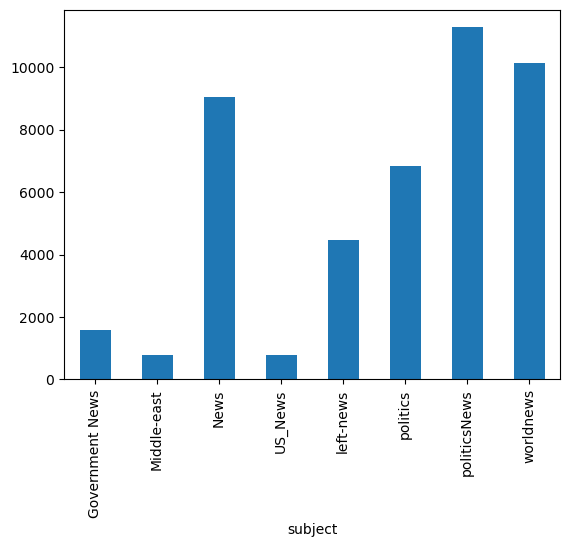

In [29]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


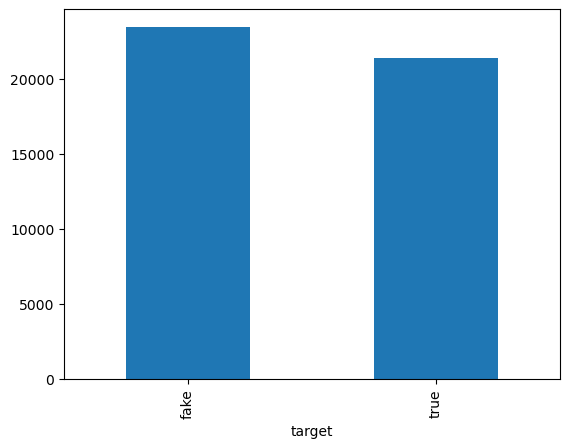

In [30]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [31]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

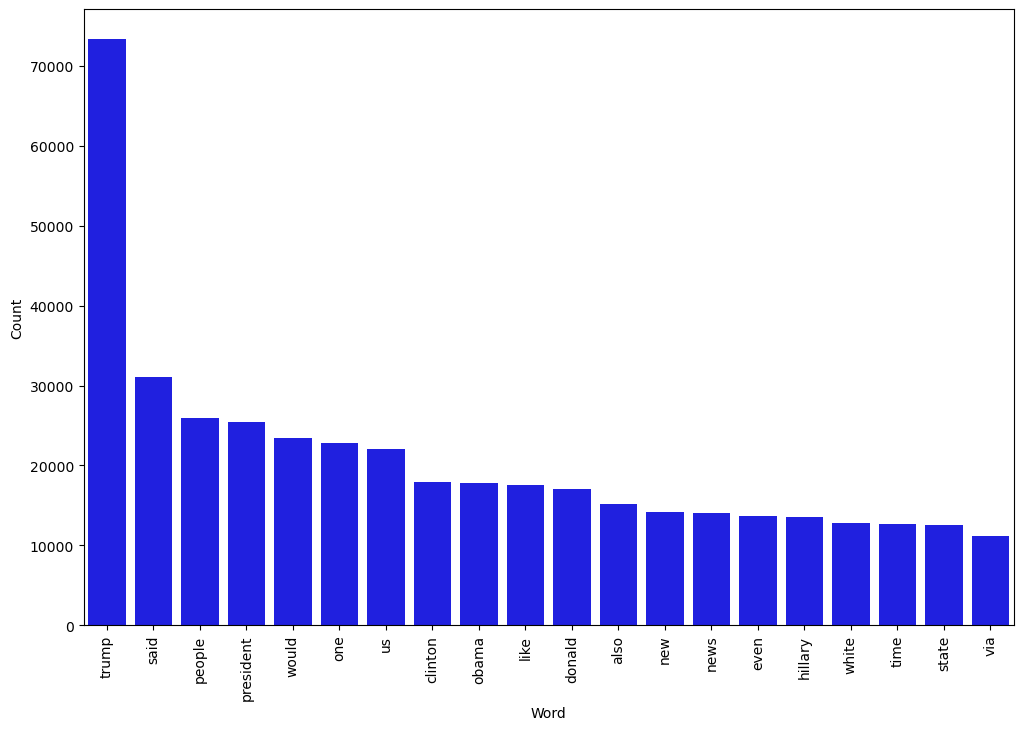

In [32]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

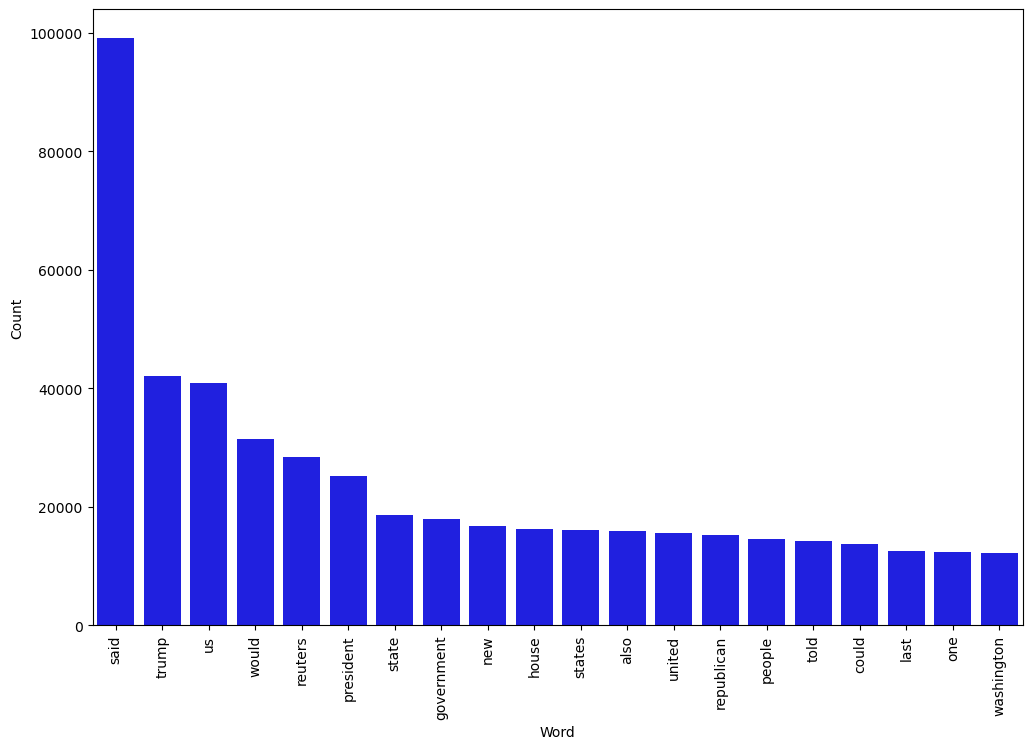

In [33]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

# Modeling

In [34]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Split Data


In [35]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [36]:
X_train.head()


36335    history repeat skipping debate bad idea tuesda...
12384    donald trump jr went congress today give yet a...
24419    washingtonnew york reuters us president donald...
24740    president trump right campaign manager wiretap...
27039    london reuters prime minister theresa may pled...
Name: text, dtype: object

In [37]:
y_train.head()


36335    fake
12384    fake
24419    true
24740    fake
27039    true
Name: target, dtype: object

# Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.52%


Confusion matrix, without normalization


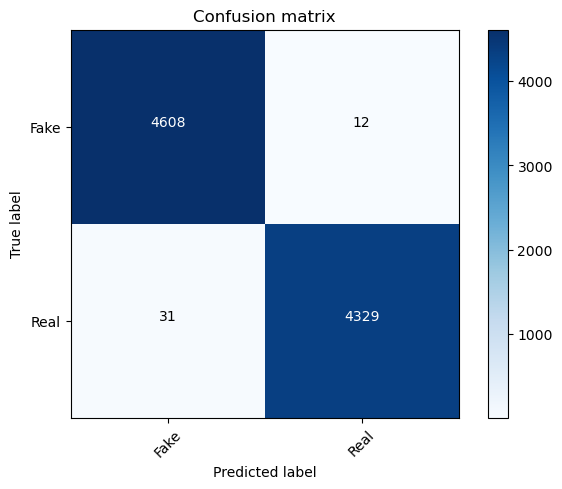

In [39]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])